In [1]:
import face_utils
import numpy as np
import imutils
import dlib
import cv2

In [21]:
# initialize dlib's face detector (HOG-based) and then create the facial landmark predictor

# dlib’s pre-trained face detector based on a modification to the standard Histogram of Oriented Gradients + Linear SVM method for object detection.
detector = dlib.get_frontal_face_detector()
# loads the facial landmark predictor
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# load the input image, resize it, and convert it to grayscale
image = cv2.imread("IMG_20190127_180801.jpg")
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [22]:
# detect faces in the grayscale image, the bounding box of faces in our image.
rects = detector(gray, 1)

- The second parameter is the number of image pyramid layers to apply when upscaling the image prior to applying the detector.
- The benefit of increasing the resolution of the input image prior to face detection is that it may allow us to detect more faces in the image — the downside is that the larger the input image, the more computationally expensive the detection process is.

In [23]:
# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy array
    shape = predictor(gray, rect)

    shape = face_utils.shape_to_np(shape)
   
    # convert dlib's rectangle to a OpenCV-style bounding box
    # i.e (x, y, w, h), then draw the face bounding box
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    # show the face number
    cv2.putText(image, "Face # {}".format(i + 1), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    for (x, y) in shape:
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

# show the output image with the face detections + facial landmarks
cv2.imshow("Output", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Detect eyes, nose, lips, and jaw

- __FACIAL_LANDMARKS_IDXS__  dictionary has been defined inside __face_utils.py__ which contains all the face region mappings,
- __visualize_facial_landmarks__ function has been included in the __imutils.py__ to visualize each of the facial landmarks and overlay the results on an input image.

In [2]:
# initialize dlib's face detector (HOG-based) and then create the facial landmark predictor

# dlib’s pre-trained face detector based on a modification to the standard Histogram of Oriented Gradients + Linear SVM method for object detection.
detector = dlib.get_frontal_face_detector()
# loads the facial landmark predictor
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# load the input image, resize it, and convert it to grayscale
image = cv2.imread("SachinKoti.jpg")
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [3]:
# detect faces in the grayscale image, the bounding box of faces in our image.
rect = detector(gray, 1)

In [4]:
shape = predictor(gray, rect[0])
shape = face_utils.shape_to_np(shape)

In [5]:
output = face_utils.visualize_facial_landmarks(image, shape)

In [6]:
cv2.imshow("Output", output)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Extracting parts of the face 

In [10]:
# initialize dlib's face detector (HOG-based) and then create the facial landmark predictor

# dlib’s pre-trained face detector based on a modification to the standard Histogram of Oriented Gradients + Linear SVM method for object detection.
detector = dlib.get_frontal_face_detector()
# loads the facial landmark predictor
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# load the input image, resize it, and convert it to grayscale
image = cv2.imread("SachinKoti.jpg")
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image, the bounding box of faces in our image.
rects = detector(gray, 1)

In [11]:
for (i, rect) in enumerate(rects):
    
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    
    for (name, (i,j)) in face_utils.FACIAL_LANDMARKS_IDXS.items():
        clone = image.copy()
        cv2.putText(clone, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        for (x, y) in shape[i:j]:
            cv2.circle(clone, (x, y), 1, (0, 0, 255), -1)
            
        # extract the ROI of the face region as a separate image
        (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
        roi = image[y : y + h, x : x + w]
        roi = imutils.resize(roi, width = 250, inter = cv2.INTER_CUBIC)
        
        # show the particular face part
        cv2.imshow("ROI", roi)
        cv2.imshow("Image", clone)
        cv2.waitKey(0)
    cv2.destroyAllWindows()
    # visualize all facial landmarks with a transparent overlay
    output = face_utils.visualize_facial_landmarks(image, shape)
    cv2.imshow("All", output)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## Real-time facial landmark detection

- detect facial landmarks in videos.

In [7]:
import face_utils
import imutils
import time
import dlib
import cv2

In [8]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
print("[INFO] loading facial landmark detector")
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

[INFO] loading facial landmark detector


In [9]:
# initialize the video stream and allow the cammera sensor to warmup
print("[INFO] camera sensor warming up...")
vs = face_utils.VideoStream().start()
time.sleep(2.0)

# The heart of our video processing pipeline can be found inside the while  loop below:

# loop over the frames from the video stream
while True:
    # grab the frame from the threaded video stream, resize it to
    # have a maximum width of 400 pixels, and convert it to
    # grayscale
    frame = vs.read()
    frame = imutils.resize(frame, width=400)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # detect faces in the grayscale frame
    rects = detector(gray, 0)

    # loop over the face detections
    for rect in rects:
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        for (x, y) in shape:
            cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)

    # show the frame
    
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1)

    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break

cv2.destroyAllWindows()

vs.stop()
del vs

[INFO] camera sensor warming up...


- As you can see, there are very little differences between detecting facial landmarks in images versus detecting facial landmarks in video streams — the main differences in the code simply involve setting up our video stream pointers and then polling the stream for frames.
- The actual process of detecting facial landmarks is the same, only instead of detecting facial landmarks in a single image we are now detecting facial landmarks in a series of frames.

- PFA snip from the run
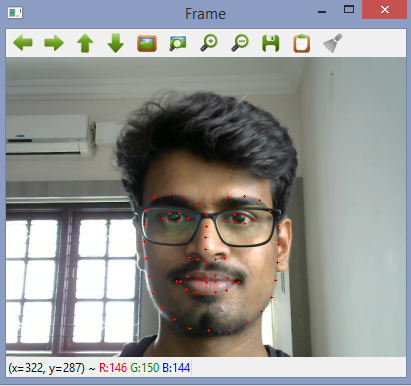

## Eye blink detection
- To build our blink detector, we’ll be computing a metric called the __eye aspect ratio (EAR)__.
- The __eye aspect ratio (EAR)__ is instead a much more elegant solution that involves a very simple calculation based on the ratio of distances between facial landmarks of the eyes.
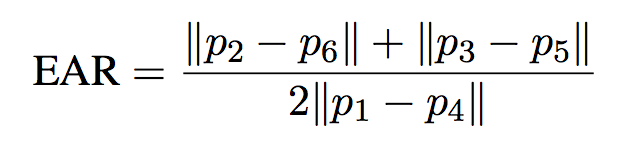

In [5]:
from scipy.spatial import distance as dist
from face_utils import FileVideoStream, VideoStream
import face_utils
import numpy as np
import time
import dlib
import cv2
import imutils

In [11]:
# define eye_aspect_ratio function

def eye_aspect_ratio(eye):
    # compute the euclidean distances between the two sets of
    # vertical eye landmarks (x, y)-coordinates
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    
    # compute the euclidean distance between the horizontal
    # eye landmark (x, y)-coordinates
    C = dist.euclidean(eye[0], eye[3])
    
    # compute the eye aspect ratio
    ear = (A + B) / (2.0 * C)
    
    # return the eye aspect ration
    return ear

In [12]:
# define two constants, one for the eye aspect ratio to indicate
# blink and then a second constant for the number of consecutive
# frames the eye must be below the threshold
EYE_AR_THRESH = 0.25
EYE_AR_CONSEC_FRAMES = 3

# initialize the frame counters and the total number of blinks
COUNTER = 0
TOTAL = 0

In [13]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [14]:
# grab the indexes of the facial landmarks for the left and
# right eye, respectively
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

In [15]:
# start the video stream thread

# vs = FileVideoStream("").start()
# fileStream = True
vs = VideoStream(src=0).start()
fileStream = False
time.sleep(1.0)

# loop over frames from the video stream
while True:
    # if this is a file video stream, then we need to check if
    # there any more frames left in the buffer to process
    if fileStream and not vs.more():
        break
    
    # grab the frame from the threaded video file stream, resize
    # it, and convert it to grayscale channels
    frame = vs.read()
    frame = imutils.resize(frame, width = 450)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # detect faces in the grayscale frame
    rects = detector(gray, 0)
    
    # loop over the face detections
    for rect in rects:
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        
        # extract the left and right eye coordinates, then use the
        # coordinates to compute the eye aspect ratio for both eyes
        leftEye = shape[lStart : lEnd]
        rightEye = shape[rStart : rEnd]
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)
        
        # average the eye aspect ratio together for both eyes
        ear = (leftEAR + rightEAR) / 2.0
        #Following the suggestion of Soukupová and Čech, we average the two eye aspect ratios together to obtain a better blink estimate
        #(making the assumption that a person blinks both eyes at the same time, of course).
        
        # compute the convex hull for the left and right eye, then
        # visualize each of the eyes
        leftEyeHull = cv2.convexHull(leftEye)
        rightEyeHull = cv2.convexHull(rightEye)
        cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
        cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)
        
        # check to see if the eye aspect ratio is below the blink
        # threshold, and if so, increment the blink frame counter
        if ear < EYE_AR_THRESH:
            COUNTER += 1
        
        # otherwise, the eye aspect ratio is not below the blink
        # threshold
        else:
            # if the eyes were closed for a sufficient number of frames
            # then increment the total number of blinks    
            if COUNTER >= EYE_AR_CONSEC_FRAMES:
                TOTAL += 1
        
            # reset the eye frame counter
            COUNTER = 0
            
        cv2.putText(frame, "Blinks: {}".format(TOTAL), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, "EAR: {:.2f}". format(ear), (300, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    if key == ord("q"):
        break

cv2.destroyAllWindows()
vs.stop()
del vs

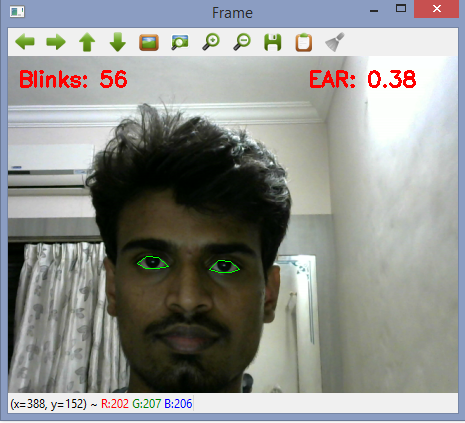

- However, due to noise in a video stream, subpar facial landmark detections, or fast changes in viewing angle, a simple threshold on the eye aspect ratio could produce a false-positive detection, reporting that a blink had taken place when in reality the person had not blinked.
- To make our blink detector more robust to these challenges, Soukupová and Čech recommend:
     - 1) Computing the eye aspect ratio for the N-th frame, along with the eye aspect ratios for N – 6 and N + 6 frames, then concatenating these eye aspect ratios to form a 13 dimensional feature vector.
     - 2) Training a Support Vector Machine (SVM) on these feature vectors.

## Drowsiness Detection

In [9]:
import playsound
from threading import Thread

In [2]:
def sound_alarm(path):
    playsound.playsound(path)

def eye_aspect_ratio(eye):
    # compute the euclidean distances between the two sets of
    # vertical eye landmarks (x, y)-coordinates
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    # compute the euclidean distance between the horizontal
    # eye landmark (x, y)-coordinates
    C = dist.euclidean(eye[0], eye[3])
    # compute the eye aspect ratio
    ear = (A + B) / (2.0 * C)
    # return the eye aspect ratio
    return ear

In [3]:
# define two constants, one for the eye aspect ratio to indicate
# blink and then a second constant for the number of consecutive
# frames the eye must be below the threshold for to set off the alarm
EYE_AR_THRESH = 0.3
EYE_AR_CONSEC_FRAMES = 48
# initialize the frame counter as well as a boolean used to
# indicate if the alarm is going off
COUNTER = 0
ALARM_ON = False

In [6]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
print("[INFO] loading facial landmark predictor...")
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

[INFO] loading facial landmark predictor...


In [7]:
# grab the indexes of the facial landmarks for the left and
# right eye, respectively
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

In [10]:
print("[INFO] Starting Video stream thread...")
vs = VideoStream().start()
time.sleep(1.0)

# loop over frames from the video stream
while True:
    # grab the frame from the threaded video file stream, resize
    # it, and convert it to grayscale
    # channels)
    frame = vs.read()
    frame = imutils.resize(frame, width=450)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # detect faces in the grayscale frame    
    rects = detector(gray, 0)

    # loop over the face detections
    for rect in rects:
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        
        # extract the left and right eye coordinates, then use the
        # coordinates to compute the eye aspect ratio for both eyes
        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)
        
        # average the eye aspect ratio together for both eyes
        ear = (leftEAR + rightEAR) / 2.0
        
        # compute the convex hull for the left and right eye, then
        # visualize each of the eyes
        leftEyeHull = cv2.convexHull(leftEye)
        rightEyeHull = cv2.convexHull(rightEye)
        cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
        cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)
        
        # check to see if the eye aspect ratio is below the blink
        # threshold, and if so, increment the blink frame counter
        if ear < EYE_AR_THRESH:
            COUNTER += 1
        
        # if the eyes were closed for a sufficient number of
        # then sound the alarm
            if COUNTER >= EYE_AR_CONSEC_FRAMES:
                # if the alarm is not on, turn it on
                if not ALARM_ON:
                    ALARM_ON = True
                    
                    # start a thread to have the alarm sound played in the background
                    # thread is used to ensure that the main execution doesn't pause while Alarm rings.
                    t = Thread(target=sound_alarm, args = ("Ringtone.mp3",))
                    t.deamon = True
                    t.start()
                
                # draw an alarm on the frame
                cv2.putText(frame, "DROWSINESS ALERT!", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        # otherwise, the eye aspect ratio is not below the blink
        # threshold, so reset the counter and alarm
        else:
            COUNTER = 0
            ALARM_ON = False
        
        cv2.putText(frame,"EAR: {:.2f}".format(ear), (300, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF
    
    if key == ord("q"):
        break

cv2.destroyAllWindows()
vs.stop()
print("Stopping Video stream")
del vs

[INFO] Starting Video stream thread...
Stopping Video stream


- PFA snip here
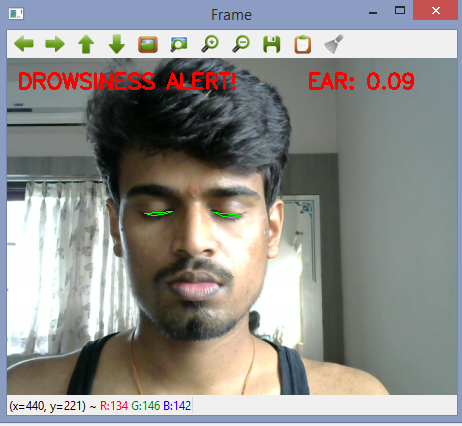